In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [124]:
region = pd.read_csv('lnglat.csv')
charger= pd.read_csv('charger.csv')
chimsoo = pd.read_csv('chimsoo.csv')
siseol = pd.read_csv('siseol.csv')

In [129]:
region.duplicated('경도_Lng-위도_Lat').sum()

0

In [131]:
charger['lat']=charger['lat'].astype(str).str[:6]
charger['lng']=charger['lng'].astype(str).str[:7]
charger['경도_Lng-위도_Lat']=charger['lng'].str[:7]+'_'+charger['lat'].str[:6]

In [150]:
charger=charger.drop(charger.columns[-2],axis=1)

In [156]:
charger=charger.drop_duplicates('경도_Lng-위도_Lat')

In [158]:
chimsoo.columns=['침수지역lng','침수지역lat']

In [160]:
chimsoo.duplicated().sum()

7

In [161]:
chimsoo=chimsoo.drop_duplicates()

In [162]:
chimsoo['침수지역lat']=chimsoo['침수지역lat'].astype(str).str[:6]
chimsoo['침수지역lng']=chimsoo['침수지역lng'].astype(str).str[:7]
chimsoo['경도_Lng-위도_Lat']=chimsoo['침수지역lng'].str[:7]+'_'+chimsoo['침수지역lat'].str[:6]

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\2221959912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chimsoo['침수지역lat']=chimsoo['침수지역lat'].astype(str).str[:6]
C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\2221959912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chimsoo['침수지역lng']=chimsoo['침수지역lng'].astype(str).str[:7]
C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\2221959912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [163]:
siseol.info()
siseol['lat_x']=siseol['lat_x'].astype(str).str[:6]
siseol['lng_x']=siseol['lng_x'].astype(str).str[:7]
siseol['경도_Lng-위도_Lat']=siseol['lng_x'].str[:7]+'_'+siseol['lat_x'].str[:6]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lng_x     126 non-null    float64
 1   lat_x     126 non-null    float64
 2   관광지명      126 non-null    object 
 3   분류        110 non-null    object 
 4   합산 검색 수   77 non-null     float64
 5   내국인 관광객수  51 non-null     float64
 6   외국인 관광객수  51 non-null     float64
 7   소재지       126 non-null    object 
dtypes: float64(5), object(3)
memory usage: 8.0+ KB


In [164]:
chimsoo['경도_Lng-위도_Lat']=chimsoo['경도_Lng-위도_Lat'].str.replace(' ','')
region['경도_Lng-위도_Lat']=region['경도_Lng-위도_Lat'].str.replace(' ','')
siseol['경도_Lng-위도_Lat']=siseol['경도_Lng-위도_Lat'].str.replace(' ','')
charger['경도_Lng-위도_Lat']=charger['경도_Lng-위도_Lat'].str.replace(' ','')

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\3388963713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chimsoo['경도_Lng-위도_Lat']=chimsoo['경도_Lng-위도_Lat'].str.replace(' ','')


In [165]:
display(region.head(2),charger.head(2),chimsoo.head(2),siseol.head(2))
print(region.shape,charger.shape,chimsoo.shape,siseol.shape)

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역
0,126.298_33.319,126.298,33.319,제주특별자치도 제주시 한림읍
1,126.299_33.319,126.299,33.319,제주특별자치도 제주시 한림읍


,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime,lat,lng,경도_Lng-위도_Lat
0,남원읍 공영주차장,50130.0,B0,B001,N,N,NaN,6,24시간 이용가능,33.278,126.721,126.721_33.278
1,위미의례회관,50130.0,A0,A004,N,N,NaN,6,24시간 이용가능,33.289,126.657,126.657_33.289


,침수지역lng,침수지역lat,경도_Lng-위도_Lat
0,126.266,33.422,126.266_33.422
1,126.275,33.422,126.275_33.422


,lng_x,lat_x,관광지명,분류,합산 검색 수,내국인 관광객수,외국인 관광객수,소재지,경도_Lng-위도_Lat
0,126.563,33.249,서귀포매일올레시장,시장,267930.0,NaN,NaN,제주특별자치도 서귀포시,126.563_33.249
1,126.492,33.507,제주국제공항,교통시설,803524.0,NaN,NaN,제주특별자치도 제주시,126.492_33.507


(97228, 4) (952, 12) (97, 3) (126, 9)


In [166]:
dfrc=pd.merge(region,charger,how='outer')

In [167]:
dfrc.shape

(97578, 15)

In [168]:
dfrc.head(1)

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime,lat,lng
0,126.298_33.319,126.298,33.319,제주특별자치도 제주시 한림읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
dfrc_1=dfrc[np.logical_and(dfrc['lat'].notnull(),dfrc['행정구역'].notnull())]

In [170]:
dfrc_1=dfrc_1.drop(['lat','lng'],axis=1)

In [171]:
dfrc_2=dfrc[dfrc['lat'].isna()]

In [172]:
dfrc_2=dfrc_2.drop(['lat','lng'],axis=1)

In [173]:
dfrc_3=dfrc[dfrc['행정구역'].isna()]

In [174]:
dfrc_3['경도_Lng']=dfrc_3['lng']
dfrc_3['위도_Lat']=dfrc_3['lat']

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\1136623835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrc_3['경도_Lng']=dfrc_3['lng']
C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\1136623835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrc_3['위도_Lat']=dfrc_3['lat']


In [175]:
dfrc_3=dfrc_3.drop(['lat','lng'],axis=1)

In [214]:
dfrc_final=pd.concat([dfrc_1,dfrc_2,dfrc_3])

In [215]:
dfrc_final.shape

(97578, 13)

In [216]:
dfrc_final=dfrc_final.reset_index().drop('index',axis=1)

In [219]:
dfrc_final[dfrc_final['행정구역'].isna()]

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime
97228,126.657_33.289,126.657,33.289,NaN,위미의례회관,50130.0,A0,A004,N,N,NaN,6.0,24시간 이용가능
97229,126.916_33.448,126.916,33.448,NaN,성산읍 공영주차장,50130.0,B0,B001,N,N,NaN,6.0,24시간 이용가능
97230,126.935_33.461,126.935,33.461,NaN,성산일출봉 공영주차장,50130.0,B0,B001,N,N,NaN,6.0,24시간 이용가능
97231,126.334_33.246,126.334,33.246,NaN,안덕우체국 뒤 주차장,50130.0,B0,B004,N,N,NaN,6.0,24시간 이용가능
97232,126.842_33.324,126.842,33.324,NaN,표선민속마을 해비치 해변 공영주차장,50130.0,B0,B001,N,N,NaN,6.0,24시간 이용가능
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97573,126.257_33.394,126.257,33.394,NaN,흑돼지 샤브왕,50110.0,E0,E006,Y,N,NaN,5.0,24시간 이용가능
97574,126.800_33.551,126.800,33.551,NaN,행원교회,50110.0,I0,I002,Y,N,NaN,5.0,24시간 이용가능
97575,126.657_33.275,126.657,33.275,NaN,카페이피엘,50130.0,E0,E005,N,N,NaN,6.0,24시간 이용가능
97576,126.898_33.398,126.898,33.398,NaN,제주올레돔,50130.0,E0,E003,Y,N,NaN,5.0,24시간 이용가능


In [220]:
dfrc_final[dfrc_final['행정구역'].isna()]['zscode'].unique()

array([50130., 50110.,    nan])

In [222]:
hangnaindex=dfrc_final[dfrc_final['행정구역'].isna()].index
# 50110 -> 제주특별자치도 제주시
# 50130 -> 제주특별자치도 서귀포시

for ind in hangnaindex:
    if str(dfrc_final.at[ind,'zscode'])=='nan':
        continue
    elif int(dfrc_final.at[ind,'zscode'])==50130:
        dfrc_final.at[ind,'행정구역']='제주특별자치도 서귀포시'
    else:
        dfrc_final.at[ind,'행정구역']='제주특별자치도 제주시'

In [223]:
dfrc_final[dfrc_final['행정구역'].isna()]

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime
97366,126.341_33.310,126.341,33.310,NaN,동광 R 주차장,NaN,B0,B004,N,N,시설 상황에 따라 이용이 제한될 수 있음,4.0,24시간 이용가능


In [230]:
dfrc_final.at[97366,'행정구역']='제주특별자치도 서귀포시 안덕면'

In [232]:
dfrc_final[dfrc_final['행정구역'].isna()]

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime


In [234]:
dfrc_final=dfrc_final.drop('zscode',axis=1)

In [237]:
dfrc_final=dfrc_final.drop('chgerType',axis=1)

In [239]:
dfrc_final.duplicated('경도_Lng-위도_Lat').sum()

0

In [240]:
dfrc_final=dfrc_final.reset_index().drop(['index'],axis=1)

In [241]:
dfrc_final.shape

(97578, 11)

In [242]:
dfrc_final

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,kind,kindDetail,parkingFree,limitYn,limitDetail,useTime
0,126.356_33.347,126.356,33.347,제주특별자치도 제주시 한림읍,그리스박물관,D0,D008,Y,N,NaN,24시간 이용가능
1,126.257_33.352,126.257,33.352,제주특별자치도 제주시 한림읍,음부리카페,E0,E005,Y,N,NaN,24시간 이용가능
2,126.241_33.358,126.241,33.358,제주특별자치도 제주시 한림읍,한림금능농공단지(제주맥주),G0,G004,Y,N,NaN,24시간 이용가능
3,126.274_33.358,126.274,33.358,제주특별자치도 제주시 한림읍,상명문화공간,I0,I006,N,N,NaN,24시간 이용가능
4,126.294_33.358,126.294,33.358,제주특별자치도 제주시 한림읍,금악정육식당,E0,E006,Y,N,NaN,24시간 이용가능
...,...,...,...,...,...,...,...,...,...,...,...
97573,126.257_33.394,126.257,33.394,제주특별자치도 제주시,흑돼지 샤브왕,E0,E006,Y,N,NaN,24시간 이용가능
97574,126.800_33.551,126.800,33.551,제주특별자치도 제주시,행원교회,I0,I002,Y,N,NaN,24시간 이용가능
97575,126.657_33.275,126.657,33.275,제주특별자치도 서귀포시,카페이피엘,E0,E005,N,N,NaN,24시간 이용가능
97576,126.898_33.398,126.898,33.398,제주특별자치도 서귀포시,제주올레돔,E0,E003,Y,N,NaN,24시간 이용가능


In [246]:
ch=[]
for cnt in dfrc_final['statNm']:
    if str(cnt)=='nan':
        ch.append('F')
    else:
        ch.append('T')
dfrc_final['충전소 설치 유무']=ch

In [247]:
dfrc_final.head(1)

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,kind,kindDetail,parkingFree,limitYn,limitDetail,useTime,충전소 설치 유무
0,126.356_33.347,126.356,33.347,제주특별자치도 제주시 한림읍,그리스박물관,D0,D008,Y,N,NaN,24시간 이용가능,T


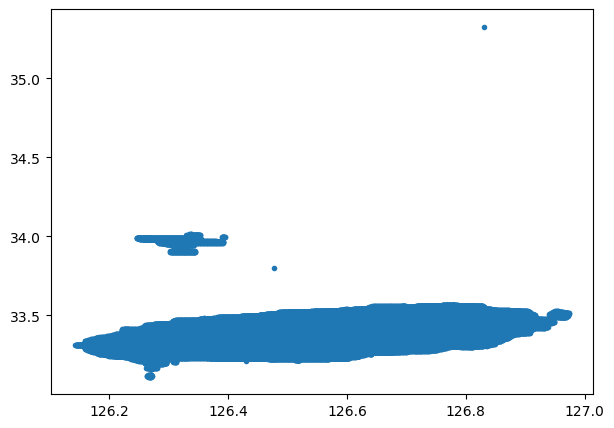

In [248]:
import matplotlib.pyplot as plt
import pandas as pd

# dfrc_final=pd.read_csv('final_temp.csv')
plt.figure(figsize=(7,5))
plt.plot(dfrc_final['경도_Lng'].astype(float),dfrc_final['위도_Lat'].astype(float),'o',markersize=3)

In [249]:
dfrc_final[dfrc_final['위도_Lat'].astype(float)>35]

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,kind,kindDetail,parkingFree,limitYn,limitDetail,useTime,충전소 설치 유무
97551,126.831_35.326,126.831,35.326,제주특별자치도 서귀포시,표선공영주차장,B0,B001,Y,N,NaN,24시간 이용가능,T


In [250]:
dfrc_final=dfrc_final.drop(97551,axis=0)

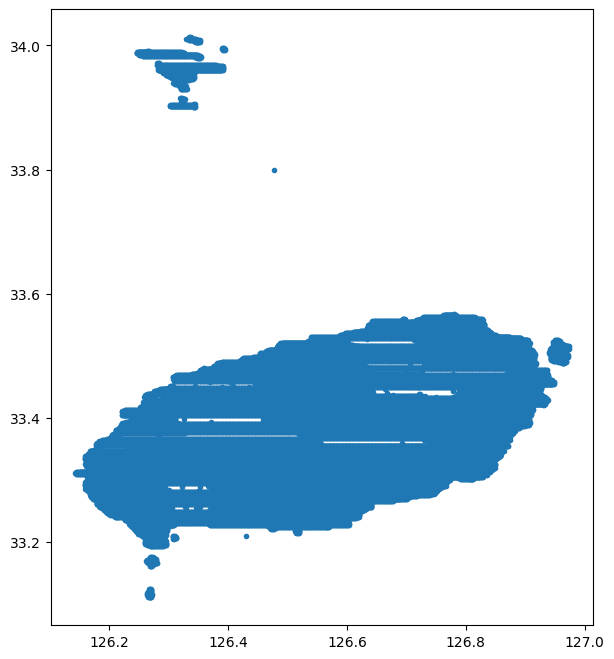

In [251]:
plt.figure(figsize=(7,8))
plt.plot(dfrc_final['경도_Lng'].astype(float),dfrc_final['위도_Lat'].astype(float),'o',markersize=3)

In [252]:
dfrc_final[np.logical_and(dfrc_final['위도_Lat'].astype(float)>33.7,dfrc_final['위도_Lat'].astype(float)<=33.81)]

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,kind,kindDetail,parkingFree,limitYn,limitDetail,useTime,충전소 설치 유무
97326,126.478_33.799,126.478,33.799,제주특별자치도 제주시,YES렌트카,G0,G004,Y,N,NaN,24시간 이용가능,T


In [255]:
dfrc_final=dfrc_final.drop(97326,axis=0)

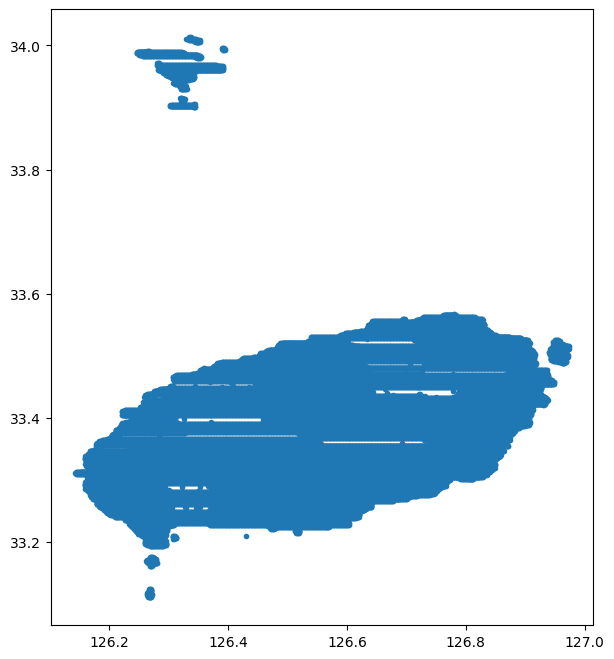

In [256]:
plt.figure(figsize=(7,8))
plt.plot(dfrc_final['경도_Lng'].astype(float),dfrc_final['위도_Lat'].astype(float),'o',markersize=3)

In [261]:
chimsoo['침수우려여부']='T'

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\1155701318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chimsoo['침수우려여부']='T'


In [264]:
chimsoo

,침수지역lng,침수지역lat,경도_Lng-위도_Lat,침수우려여부
0,126.266,33.422,126.266_33.422,T
1,126.275,33.422,126.275_33.422,T
2,126.273,33.422,126.273_33.422,T
3,126.251,33.403,126.251_33.403,T
4,126.313,33.465,126.313_33.465,T
...,...,...,...,...
99,126.555,33.493,126.555_33.493,T
100,126.556,33.493,126.556_33.493,T
101,126.554,33.494,126.554_33.494,T
102,126.555,33.494,126.555_33.494,T


In [278]:
df_final=pd.merge(dfrc_final,chimsoo,how='outer')

In [279]:
chimnan=df_final[df_final['행정구역'].isna()].index

for ind in chimnan:
    df_final.at[ind,'경도_Lng']=df_final.at[ind,'침수지역lng']
    df_final.at[ind,'위도_Lat']=df_final.at[ind,'침수지역lat']

In [282]:
df__final=df_final.drop(['침수지역lng','침수지역lat'],axis=1)

In [284]:
df_final=df__final.drop('충전소 설치 유무',axis=1)

In [285]:
df_final

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,kind,kindDetail,parkingFree,limitYn,limitDetail,useTime,침수우려여부
0,126.356_33.347,126.356,33.347,제주특별자치도 제주시 한림읍,그리스박물관,D0,D008,Y,N,NaN,24시간 이용가능,NaN
1,126.257_33.352,126.257,33.352,제주특별자치도 제주시 한림읍,음부리카페,E0,E005,Y,N,NaN,24시간 이용가능,NaN
2,126.241_33.358,126.241,33.358,제주특별자치도 제주시 한림읍,한림금능농공단지(제주맥주),G0,G004,Y,N,NaN,24시간 이용가능,NaN
3,126.274_33.358,126.274,33.358,제주특별자치도 제주시 한림읍,상명문화공간,I0,I006,N,N,NaN,24시간 이용가능,NaN
4,126.294_33.358,126.294,33.358,제주특별자치도 제주시 한림읍,금악정육식당,E0,E006,Y,N,NaN,24시간 이용가능,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
97613,126.845_33.523,126.845,33.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
97614,126.846_33.523,126.846,33.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
97615,126.847_33.523,126.847,33.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
97616,126.328_33.946,126.328,33.946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T


In [289]:
df_final=pd.merge(df_final,siseol,how='outer')

In [293]:
df_final[df_final['경도_Lng'].isna()].head(2)

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,kind,kindDetail,parkingFree,limitYn,limitDetail,useTime,침수우려여부,lng_x,lat_x,관광지명,분류,합산 검색 수,내국인 관광객수,외국인 관광객수,소재지
97618,126.941_33.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.941,33.458,성산일출봉,자연경관(산),195037.0,108279.333333,34046.75,제주특별자치도 서귀포시 성산읍
97619,126.239_33.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.239,33.394,협재해수욕장,자연경관(하천/해양),186252.0,NaN,NaN,제주특별자치도 제주시 한림읍


In [294]:
lngnaind=df_final[df_final['경도_Lng'].isna()].index

for ind in lngnaind:
    df_final.at[ind,'경도_Lng']=df_final.at[ind,'lng_x']
    df_final.at[ind,'위도_Lat']=df_final.at[ind,'lat_x']

In [296]:
df_final=df_final.drop(['lng_x','lat_x'],axis=1)

In [301]:
hangna=df_final[np.logical_and(df_final['행정구역'].isna(),df_final['소재지'].notna())].index

for ind in hangna:
    df_final.at[ind,'행정구역']=df_final.at[ind,'소재지']

In [309]:
df_final=df_final.drop('소재지',axis=1)

In [310]:
df_final.isna().sum()

경도_Lng-위도_Lat        0
경도_Lng               0
위도_Lat               0
행정구역                42
statNm           96724
kind             96724
kindDetail       96724
parkingFree      96724
limitYn          96724
limitDetail      97582
useTime          96731
침수우려여부           97577
관광지명             97548
분류               97564
합산 검색 수          97597
내국인 관광객수         97623
외국인 관광객수         97623
dtype: int64

In [315]:
df_final[df_final['행정구역'].isna()]

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,kind,kindDetail,parkingFree,limitYn,limitDetail,useTime,침수우려여부,관광지명,분류,합산 검색 수,내국인 관광객수,외국인 관광객수
97576,126.251_33.403,126.251,33.403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97577,126.443_33.43,126.443,33.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97578,126.42_33.465,126.42,33.465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97579,126.837_33.53,126.837,33.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97580,126.855_33.524,126.855,33.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97581,126.749_33.554,126.749,33.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97582,126.854_33.347,126.854,33.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97583,126.199_33.349,126.199,33.349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97584,126.224_33.324,126.224,33.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN
97585,126.95_33.494,126.95,33.494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN


In [329]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ser
from webdriver_manager.microsoft import EdgeChromiumDriverManager as ecdm
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys


In [318]:
driver=webdriver.Edge(ecdm().install())

[WDM] - Downloading: 100%|██████████| 8.85M/8.85M [00:00<00:00, 19.1MB/s]
C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\3006534996.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Edge(ecdm().install())


In [327]:
df_final[df_final['행정구역'].isna()]['경도_Lng'].values[0]

'126.251'

In [340]:
driver=webdriver.Edge(ecdm().install())
driver.get('https://www.google.co.kr/maps/?hl=ko')

element=driver.find_element(by=By.ID,value='searchboxinput')
element.send_keys(df_final[df_final['행정구역'].isna()]['위도_Lat'].values[1]+","+df_final[df_final['행정구역'].isna()]['경도_Lng'].values[1])
element.send_keys(Keys.ENTER)

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_29016\1696586669.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Edge(ecdm().install())


In [331]:
region=driver.find_element(By.CLASS_NAME,value='DkEaL')

In [334]:
from bs4 import BeautifulSoup as bs
bss=bs(driver.page_source)

In [339]:
bss.find('div',attrs={'role':'button','jstcache':'899'})

<div aria-label="주소,동해" class="Y4SsEe" data-hide-tooltip-on-mouse-move="true" data-section-id="142" data-tooltip="주소 복사" jsaction="pane.info.copyText;keydown:pane.info.copyText;clickmod:pane.info.copyText;focus:pane.focusTooltip;blur:pane.blurTooltip;" jsan="0.role,0.jsaction,t-ckNWNo3yoWM,0.aria-label,7.Y4SsEe,0.data-hide-tooltip-on-mouse-move,0.data-section-id,0.data-tooltip,0.tabindex,0.jslog,t-1FDPnC-Tv9Q" jslog="36622;track:click;metadata:WyIwYWhVS0V3aXBsWVhYcWNIOEFoWFlFNGdLSGYtdEFha1E4QmNJQXlnQSJd;mutable:true" jstcache="899" role="button" tabindex="0"> <div class="LCF4w" jsan="7.LCF4w" jstcache="901"> <span class="w6bPT" jsan="t-5WpAKXytTig,7.w6bPT,0.role" jstcache="902" role="presentation"> <img jsan="8.src,0.role" jstcache="945" role="presentation" src="//www.gstatic.com/images/icons/material/system_gm/2x/place_gm_blue_24dp.png"/> <span jstcache="946" style="display:none"> </span> </span> <div jstcache="903" style="display:none"></div> <span jstcache="904" style="display:none"

In [341]:
df_final.to_csv('final.csv',index=None)